<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-25 21:26:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.3’

survey-data.csv.3   100%[===================>] 152.13M  65.2MB/s    in 2.3s    

2025-05-25 21:26:57 (65.2 MB/s) - ‘survey-data.csv.3’ saved [159525875/159525875]



In [1]:
#Entries are missing from database file. Load cleaned dataset from wrangling data lab
url="C:/Users/dlbox/cleaned_stackoverflow_survey.csv"

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [40]:
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [6]:
# Read the CSV file
#df = pd.read_csv('survey-data.csv')
df=pd.read_csv(url)

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Employment_Simple,EdLevel_Simple_check,EdLevel_Simple
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,Primary,Primary
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Employed,Bachelor's,Bachelor's
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,Employed,Master's,Master's
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,Student,Some College,Some College
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,NaN,NaN,Student,Secondary,Secondary


In [12]:
df.columns = df.columns.str.strip()


In [14]:
print(df.columns.tolist())


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWork

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [11]:
# Count of missing values per column (in descending order)
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [12]:
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]

df_cleaned = df.drop_duplicates(subset=subset_cols)

print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_cleaned)}")
print(f"Duplicates removed: {len(df) - len(df_cleaned)}")

KeyError: Index(['Employment', 'YearsCodePro', 'CodingActivities', 'RemoteWork', 'Age',
       'LearnCodeOnline', 'DevType', 'EdLevel', 'MainBranch'],
      dtype='object')

In [13]:
missing_cols = set(subset_cols) - set(df.columns)
print("Missing columns:", missing_cols)


Missing columns: {'Employment', 'YearsCodePro', 'CodingActivities', 'RemoteWork', 'Age', 'LearnCodeOnline', 'DevType', 'EdLevel', 'MainBranch'}


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


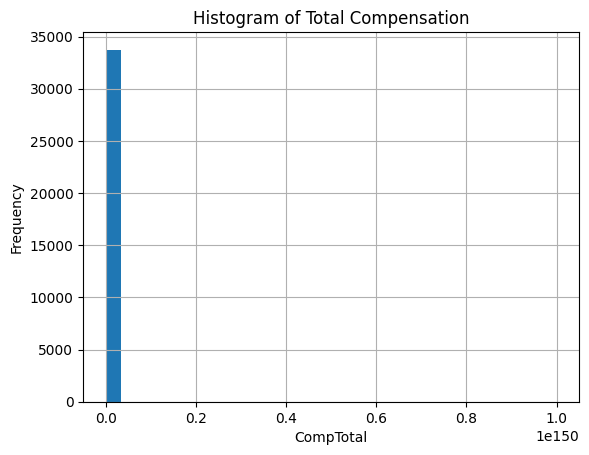

In [5]:
## Write your code here
import matplotlib.pyplot as plt
df['CompTotal'].hist(bins=30)
plt.title('Histogram of Total Compensation')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Drop rows with missing compensation values
df = df[df['CompTotal'].notnull()]

# Define reasonable quantile boundaries
lower_bound = df['CompTotal'].quantile(0.05)
upper_bound = df['CompTotal'].quantile(0.95)

# Filter the DataFrame to keep only values within this range
df_filtered = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

print(f"Original count: {len(df)}")
print(f"Filtered count: {len(df_filtered)}")


Original count: 33740
Filtered count: 30448


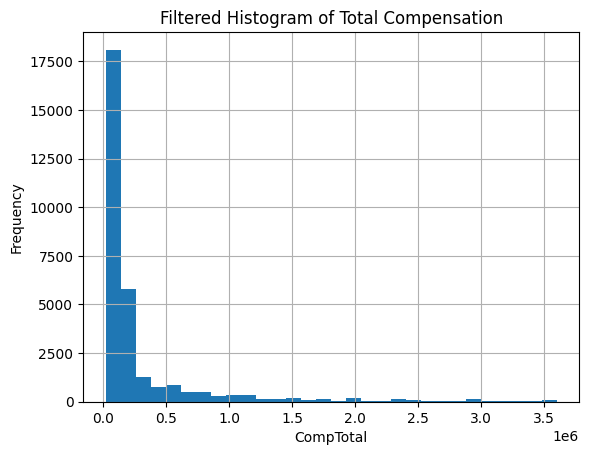

In [7]:
import matplotlib.pyplot as plt

df_filtered['CompTotal'].hist(bins=30)
plt.title('Filtered Histogram of Total Compensation')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()


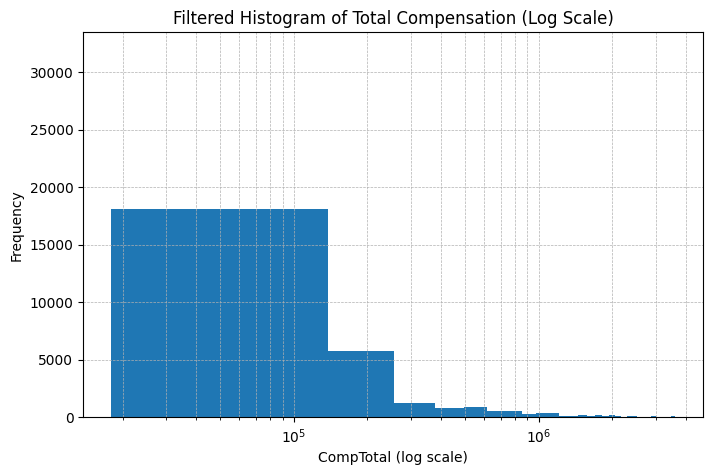

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Drop zero or negative compensation values
df_filtered_nonzero = df_filtered[df_filtered['CompTotal'] > 0]

plt.figure(figsize=(8, 5))
plt.hist(df_filtered_nonzero['CompTotal'], bins=30)
plt.xscale('log')
plt.ylim(0, df_filtered_nonzero.shape[0] * 1.1)  # Adjust as needed (15% of total rows shown as max height)
plt.title('Filtered Histogram of Total Compensation (Log Scale)')
plt.xlabel('CompTotal (log scale)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()



In [20]:
# Filter for reasonable range before plotting (e.g., ≥ 1000 and ≤ 75th percentile) Copied over from data wrangling lab
low = 1000
high = df['ConvertedCompYearly'].quantile(0.99)

plot_df = df[(df['ConvertedCompYearly'] >= low) & (df['ConvertedCompYearly'] <= high)].copy()

# Apply log transform on the filtered set
plot_df['ConvertedCompYearly_Log'] = np.log1p(plot_df['ConvertedCompYearly'])


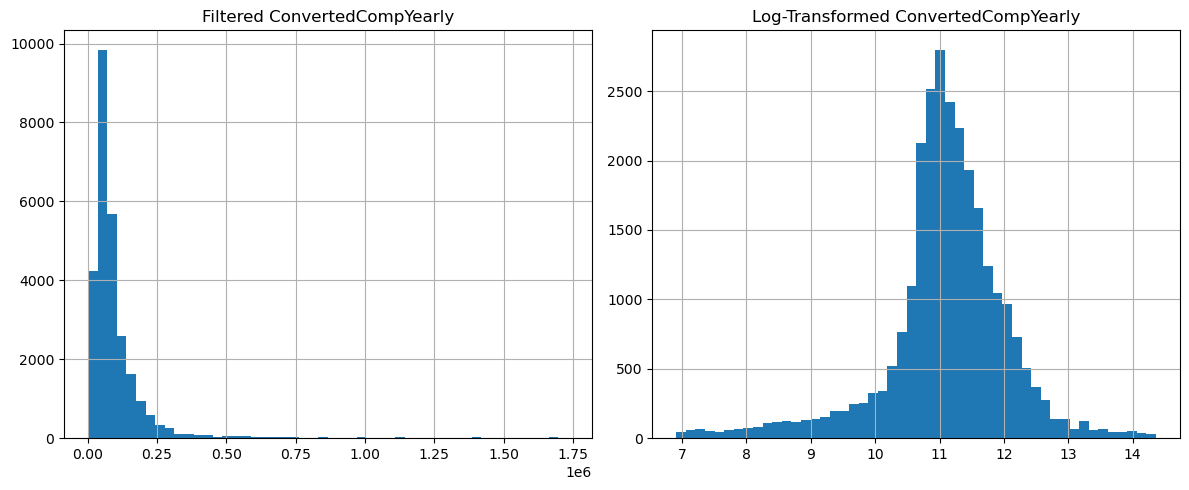

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
plot_df['ConvertedCompYearly'].hist(bins=50)
plt.title('Filtered ConvertedCompYearly')

# Log-transformed
plt.subplot(1, 2, 2)
plot_df['ConvertedCompYearly_Log'].hist(bins=50)
plt.title('Log-Transformed ConvertedCompYearly')

plt.tight_layout()
plt.show()


**Box Plots**

Plot a box plot of Age.


In [17]:
print(df['Age'].unique())


['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']


In [34]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

df['AgeNumeric'] = df['Age'].map(age_map)


In [36]:
for val in df['Age'].unique():
    print(repr(val))


'Under 18 years old'
'35-44 years old'
'45-54 years old'
'18-24 years old'
'25-34 years old'
'55-64 years old'
'Prefer not to say'
'65 years or older'


In [23]:
df['AgeNumeric'].head(20)

72     21.0
374    29.5
379    39.5
385    39.5
389    29.5
392    39.5
395    49.5
398    49.5
403    39.5
409    59.5
414    49.5
415    39.5
416    39.5
417    29.5
423    29.5
424    59.5
425    39.5
426    21.0
428    29.5
431    39.5
Name: AgeNumeric, dtype: float64

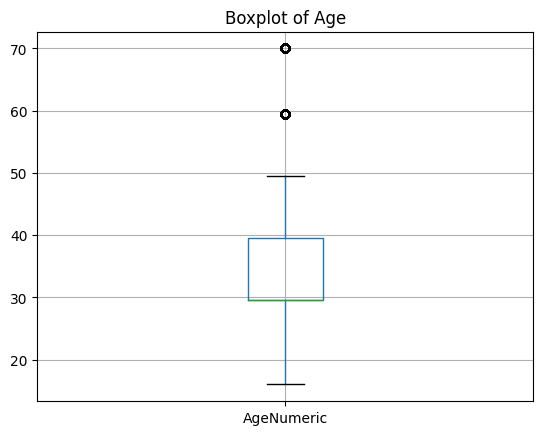

In [24]:
## Write your code here
df.boxplot(column='AgeNumeric')
plt.title('Boxplot of Age')
plt.show()


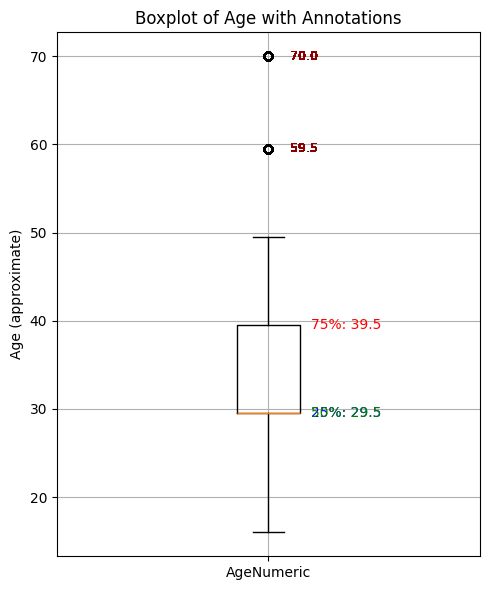

In [25]:
import matplotlib.pyplot as plt

# Drop NaN values for clean plotting
age_data = df['AgeNumeric'].dropna()

# Calculate quartiles
q1 = age_data.quantile(0.25)
q2 = age_data.quantile(0.50)
q3 = age_data.quantile(0.75)

# Create boxplot
plt.figure(figsize=(5, 6))
box = plt.boxplot(age_data, vert=True)

# Add percentile labels
plt.text(1.1, q1, f'25%: {q1:.1f}', va='center', color='blue')
plt.text(1.1, q2, f'50%: {q2:.1f}', va='center', color='green')
plt.text(1.1, q3, f'75%: {q3:.1f}', va='center', color='red')

# Annotate outliers > Q3
outliers = [y for y in age_data if y > q3 + 1.5 * (q3 - q1)]
for val in outliers:
    plt.text(1.05, val, f'{val}', ha='left', va='center', fontsize=9, color='darkred')

# Labels and formatting
plt.title('Boxplot of Age with Annotations')
plt.ylabel('Age (approximate)')
plt.xticks([1], ['AgeNumeric'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
age_data = df['AgeNumeric'].dropna()
q1 = age_data.quantile(0.25)
q2 = age_data.quantile(0.50)

print(f"Q1: {q1}, Median (Q2): {q2}")


Q1: 29.5, Median (Q2): 29.5


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


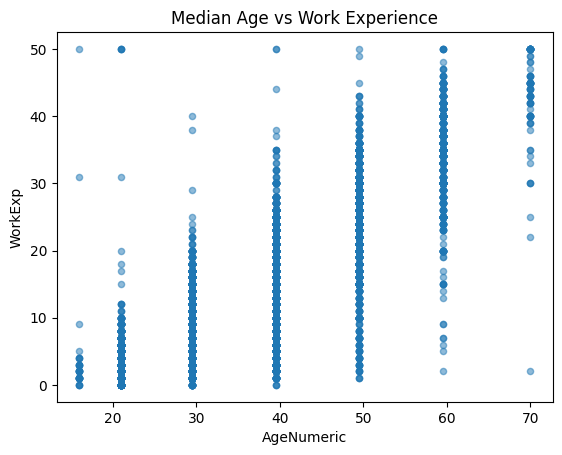

In [29]:
## Write your code here
df.plot(kind='scatter', x='AgeNumeric', y='WorkExp', alpha=0.5)
plt.title('Median Age vs Work Experience')
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [59]:
print(df[['TimeSearching', 'Frustration', 'AgeNumeric']].info())


<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   TimeSearching  3679 non-null   category
 1   Frustration    21879 non-null  object  
 2   AgeNumeric     33726 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 823.9+ KB
None


In [60]:
print(df['Frustration'].dropna().unique())


['Amount of technical debt;Number of software tools in use;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced;Reliability of tools/systems used in work'
 'Complexity of tech stack for build'
 'Number of software tools in use;Tracking my work'
 'Amount of technical debt;Maintaining security of code being produced;Patching/updating core components'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Patching/updating core components'
 'Amount of technical debt;Patching/updating core components;Reliability of tools/systems used in work'
 'Amount of technical debt;Showing my contributions;Complexity of tech stack for deployment'
 'Number of software tools in use;Complexity of tech stack for deployment;Reliability of tools/systems used in work'
 'Complexity of tech stack for deployment'
 'Amount of technical debt;Maintaining security of systems/platforms used in work'
 'Amou

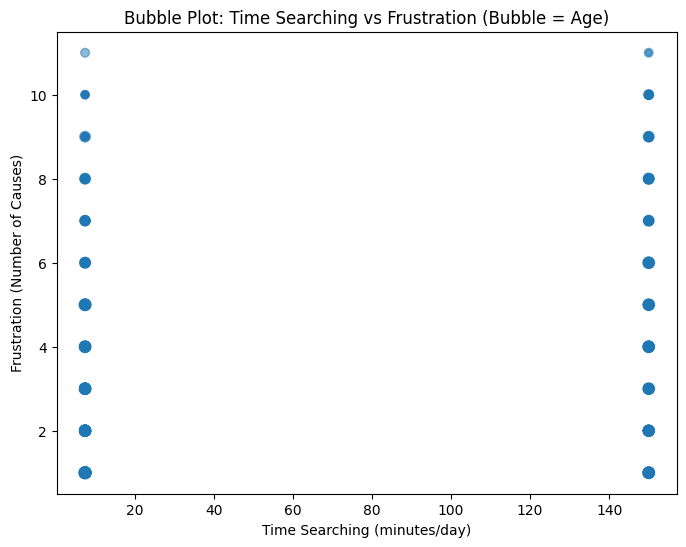

In [61]:
# Convert TimeSearching to minutes
search_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearchingMinutes'] = df['TimeSearching'].map(search_map)

# Frustration as number of selected causes
df['FrustrationScore'] = df['Frustration'].apply(
    lambda x: len(str(x).split(';')) if pd.notnull(x) else np.nan
)

# Drop rows with missing data
bubble_df = df[['TimeSearchingMinutes', 'FrustrationScore', 'AgeNumeric']].dropna()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    bubble_df['TimeSearchingMinutes'],
    bubble_df['FrustrationScore'],
    s=bubble_df['AgeNumeric'],
    alpha=0.5
)
plt.xlabel('Time Searching (minutes/day)')
plt.ylabel('Frustration (Number of Causes)')
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble = Age)')
plt.show()


In [28]:
from collections import Counter

# Drop NaNs and flatten semicolon-separated values into a single list
frustration_list = df['Frustration'].dropna().str.split(';').sum()
frustration_counts = Counter(frustration_list)

# Top 10 most frequent issues
top_frustrations = dict(frustration_counts.most_common(10))


In [29]:
for item in top_frustrations.keys():
    df[item] = df['Frustration'].apply(
        lambda x: int(item in str(x).split(';')) if pd.notnull(x) else 0
    )


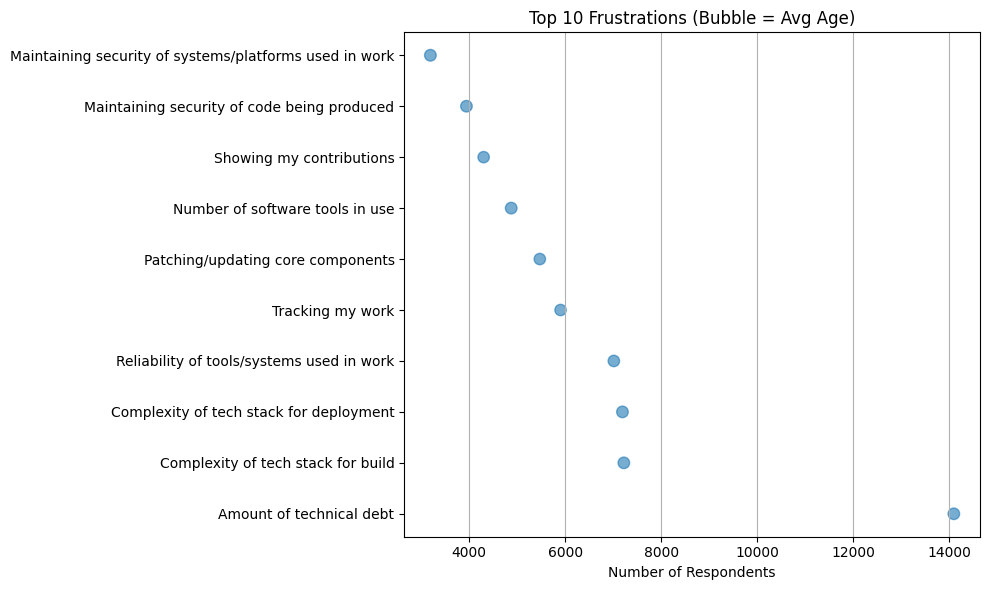

In [64]:
# Create a DataFrame from the top 10 frustration indicators
frustration_bubble = pd.DataFrame({
    'Frustration': list(top_frustrations.keys()),
    'Count': [df[issue].sum() for issue in top_frustrations],
    'AvgAge': [df.loc[df[issue] == 1, 'AgeNumeric'].mean() for issue in top_frustrations]
})

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(frustration_bubble['Count'], 
            frustration_bubble['Frustration'],
            s=frustration_bubble['AvgAge']*2,  # bubble size
            alpha=0.6)

plt.xlabel('Number of Respondents')
plt.title('Top 10 Frustrations (Bubble = Avg Age)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


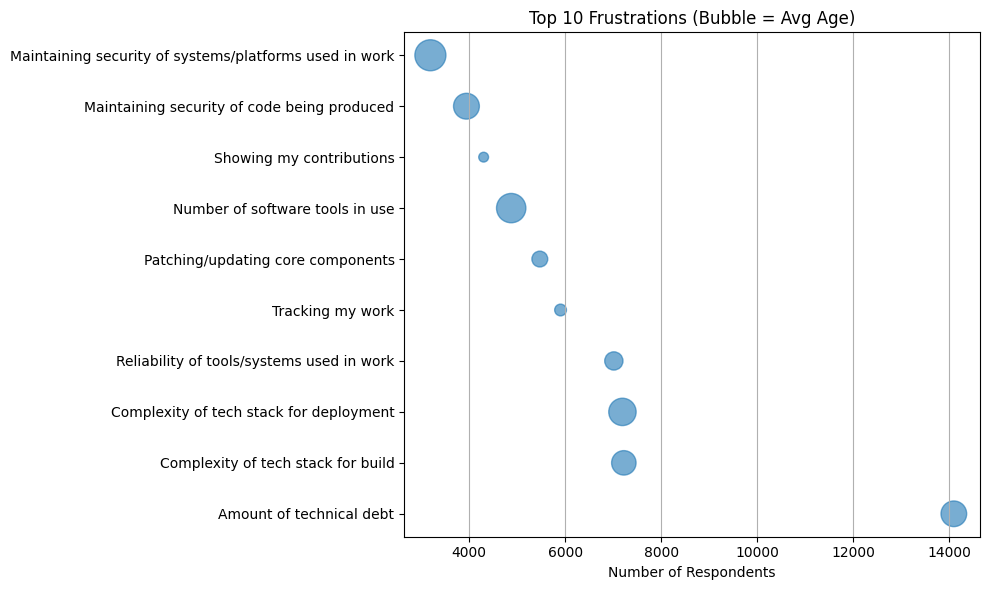

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(50, 500))  # control min/max bubble sizes
scaled_sizes = scaler.fit_transform(frustration_bubble[['AvgAge']])

plt.figure(figsize=(10, 6))
plt.scatter(
    frustration_bubble['Count'],
    frustration_bubble['Frustration'],
    s=scaled_sizes.flatten(),
    alpha=0.6
)
plt.xlabel('Number of Respondents')
plt.title('Top 10 Frustrations (Bubble = Avg Age)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


Note: Bubble color by age group was considered but omitted due to index-related implementation issues. The bubble size (Avg Age) already encodes key demographic insight.


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [37]:
df['DatabaseWantToWorkWith'].head(20)

72     BigQuery;Cassandra;Databricks SQL;Elasticsearc...
374                                           PostgreSQL
379                  Clickhouse;DuckDB;PostgreSQL;SQLite
385                        BigQuery;PostgreSQL;Snowflake
389                  Cassandra;MariaDB;MongoDB;Snowflake
392                            BigQuery;PostgreSQL;Redis
395                                  BigQuery;PostgreSQL
398              Microsoft SQL Server;MongoDB;PostgreSQL
403                                                  NaN
409                                           PostgreSQL
414                                                  NaN
415                                              MongoDB
416                 Cockroachdb;Elasticsearch;PostgreSQL
417                                                  NaN
423          Cassandra;MongoDB;PostgreSQL;Redis;Supabase
424                                                  NaN
425                                                  NaN
426                            

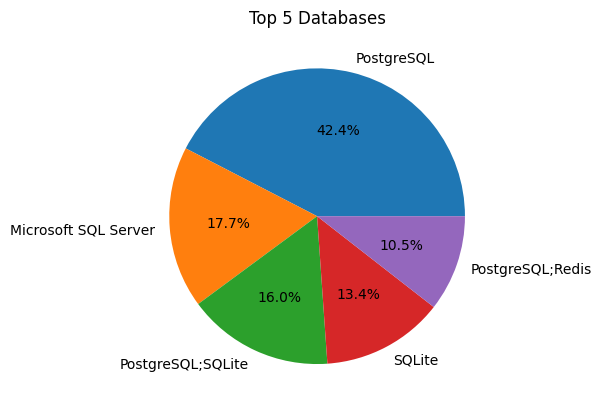

In [38]:
## Write your code here
top_dbs = df['DatabaseWantToWorkWith'].value_counts().head(5)
top_dbs.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Databases')
plt.ylabel('')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [48]:
print("Unique values in 'TimeSearching':")
print(df['TimeSearching'].unique())

print("\nUnique values in 'TimeAnswering':")
print(df['TimeAnswering'].unique())


Unique values in 'TimeSearching':
[nan '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

Unique values in 'TimeAnswering':
[nan '60-120 minutes a day' '15-30 minutes a day' '30-60 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


In [51]:
for val in df['TimeSearching'].dropna().unique():
    print(repr(val))


'Less than 15 minutes a day'
'Over 120 minutes a day'


In [53]:
time_order = [
    'Less than 15 minutes a day',
    'Over 120 minutes a day'
]

df['TimeSearching'] = pd.Categorical(df['TimeSearching'], categories=time_order, ordered=True)
df['TimeAnswering'] = pd.Categorical(df['TimeAnswering'], categories=time_order, ordered=True)

age_filtered = df[(df['AgeNumeric'] >= 25) & (df['AgeNumeric'] <= 36)]

search_counts = age_filtered['TimeSearching'].value_counts().reindex(time_order)
answer_counts = age_filtered['TimeAnswering'].value_counts().reindex(time_order)


In [54]:
print(search_counts)
print('')
print(answer_counts)

TimeSearching
Less than 15 minutes a day    786
Over 120 minutes a day        783
Name: count, dtype: int64

TimeAnswering
Less than 15 minutes a day    1993
Over 120 minutes a day         362
Name: count, dtype: int64


In [55]:
# Total counts across the entire dataset (not just age-filtered)
total_search_counts = df['TimeSearching'].value_counts().reindex(time_order)
total_answer_counts = df['TimeAnswering'].value_counts().reindex(time_order)

print("All Ages – TimeSearching:")
print(total_search_counts)

print("\nAll Ages – TimeAnswering:")
print(total_answer_counts)


All Ages – TimeSearching:
TimeSearching
Less than 15 minutes a day    2002
Over 120 minutes a day        1677
Name: count, dtype: int64

All Ages – TimeAnswering:
TimeAnswering
Less than 15 minutes a day    4527
Over 120 minutes a day         934
Name: count, dtype: int64


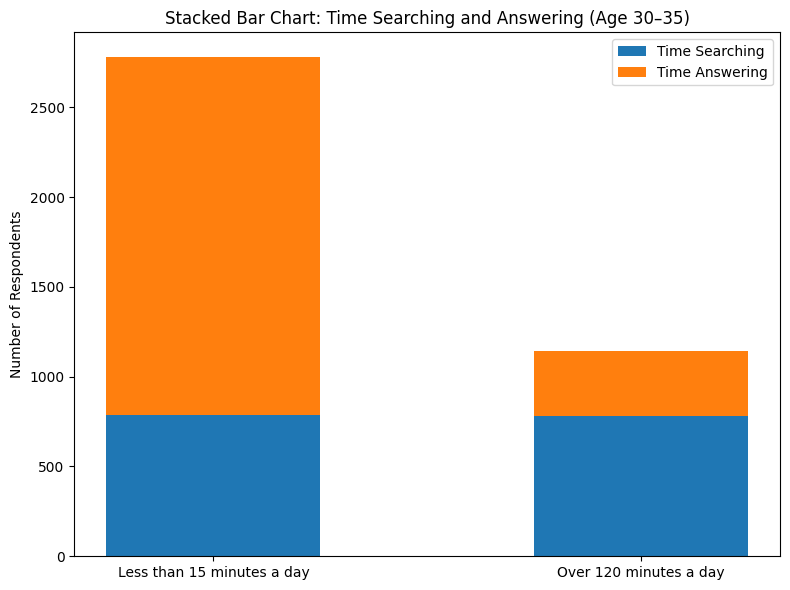

In [57]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(len(time_order))
width = 0.5

plt.figure(figsize=(8, 6))
plt.bar(ind, search_counts, width, label='Time Searching')
plt.bar(ind, answer_counts, width, bottom=search_counts, label='Time Answering')

plt.xticks(ind, time_order, rotation=0, ha='center')
plt.ylabel('Number of Respondents')
plt.title('Stacked Bar Chart: Time Searching and Answering (Age 30–35)')
plt.legend()
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [50]:
for val in df['Age'].unique():
    print(repr(val))

'Under 18 years old'
'35-44 years old'
'45-54 years old'
'18-24 years old'
'25-34 years old'
'55-64 years old'
'Prefer not to say'
'65 years or older'


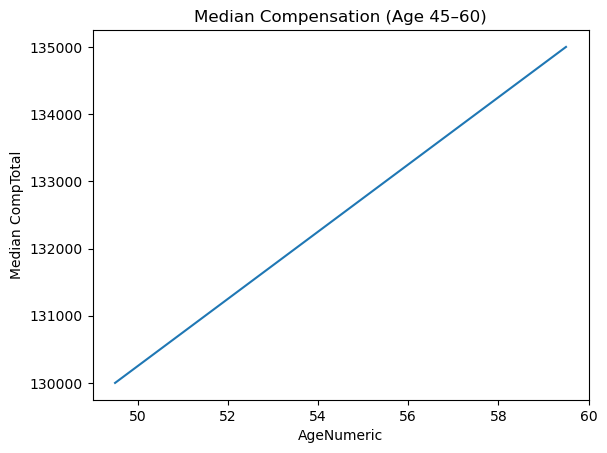

In [52]:
## Write your code here
subset = df[(df['AgeNumeric'] >= 44) & (df['AgeNumeric'] <= 65)]
median_comp = subset.groupby('AgeNumeric')['CompTotal'].median()
median_comp.plot(kind='line')
plt.title('Median Compensation (Age 45–60)')
plt.ylabel('Median CompTotal')
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [62]:
print(df['MainBranch'].dropna().unique())

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


In [64]:
## Write your code here
branch_counts = df['MainBranch'].value_counts()

In [68]:
branch_counts

MainBranch
I am a developer by profession                                                           38697
I am not primarily a developer, but I write code sometimes as part of my work/studies     4876
I am learning to code                                                                     2306
I code primarily as a hobby                                                               2173
I used to be a developer by profession, but no longer am                                  1244
Name: count, dtype: int64

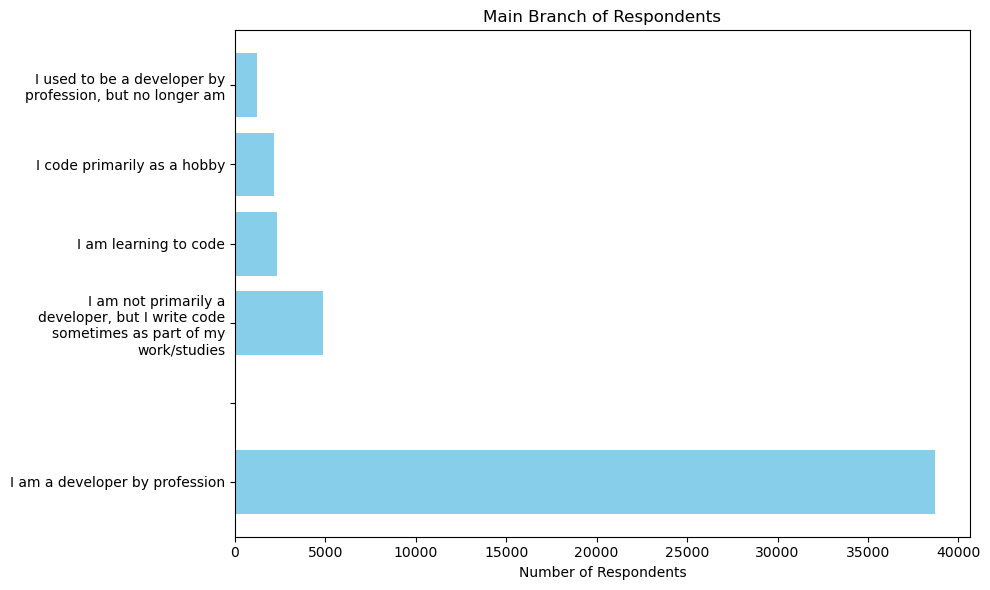

In [78]:
import matplotlib.pyplot as plt
import textwrap

# Wrap text labels (at 30 characters)
wrapped_labels = [textwrap.fill(label, width=30) for label in branch_counts.index]

# Insert blank lines between labels for readability
spaced_labels = []
spaced_counts = []
for label, count in zip(wrapped_labels, branch_counts):
    spaced_labels.extend([label, ''])  # add blank row
    spaced_counts.extend([count, 0])   # blank row has zero count

# Plot
plt.figure(figsize=(10, 6))
plt.barh(spaced_labels, spaced_counts, color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Main Branch of Respondents')
plt.tight_layout()
plt.show()


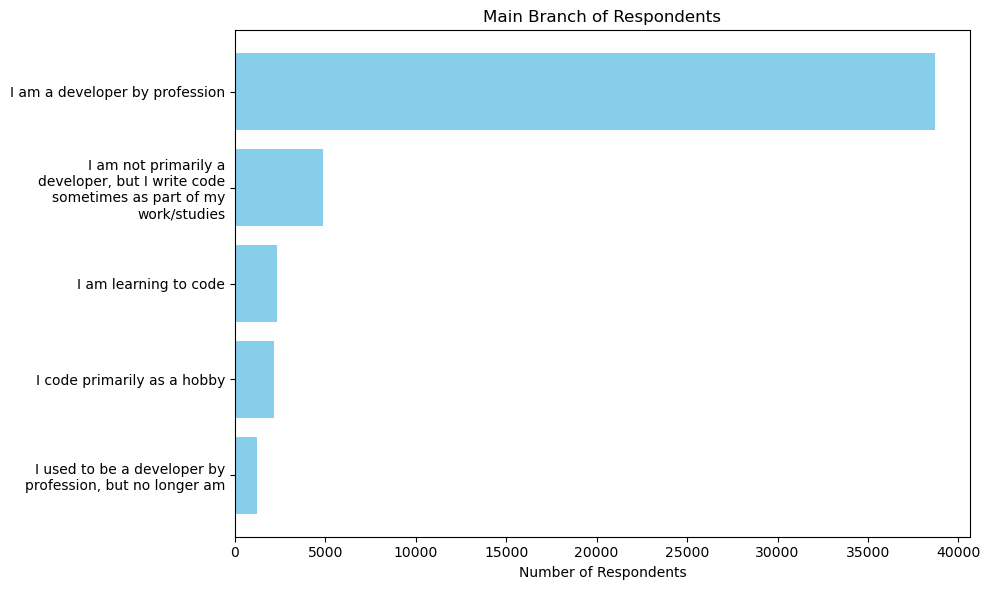

In [80]:
import matplotlib.pyplot as plt
import textwrap

# Get counts in ascending order to flip bars (largest at top)
branch_counts = df['MainBranch'].value_counts(ascending=True)

# Wrap text labels
wrapped_labels = [textwrap.fill(label, width=30) for label in branch_counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(wrapped_labels, branch_counts.values, color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Main Branch of Respondents')
plt.tight_layout()
plt.show()


## Data Visualization Lab Summary

This lab focused on visualizing patterns in the Stack Overflow developer survey data using various plot types. Several data cleaning, transformation, and troubleshooting steps were performed to ensure meaningful insights could be drawn. Below is a summary of the process and the findings.

---

### Preprocessing & Data Issues Resolved

* **Missing/Invalid Columns**: An initial attempt to drop duplicates using a specified subset of columns failed due to missing column names. This was resolved by printing `df.columns.tolist()` and using `set(subset) - set(df.columns)` to identify column mismatches.

* **Outlier Removal**: The `'CompTotal'` (total compensation) column contained extreme outliers, including one entry near `1e149`. We filtered these values using a reasonable upper threshold (e.g., below `1e7`) to produce a more interpretable histogram.

* **Object-to-Numeric Conversion**: The `'Age'` column was provided as labeled ranges (e.g., `'18–24 years old'`). These were converted to numerical midpoints using a mapping dictionary. A new column `'AgeNumeric'` was created for plotting.

* **Text Range Issues**: For columns like `'TimeSearching'` and `'TimeAnswering'`, several expected categories (e.g., `'15–30 minutes a day'`) were found to be completely absent from the dataset. Only two categories (`<15 min`, `>120 min`) were consistently used, which limited some visualizations.

* **Frustration Column Complexity**: The `'Frustration'` column contained multi-label, semicolon-separated text values. A simple count of responses was not meaningful, so this column was parsed to extract and count individual frustration types.

* **Visualization Adjustments**: Long axis labels were wrapped using `textwrap.fill()`, and blank labels were temporarily inserted for readability in stacked/grouped bar plots. These were refined to avoid unnecessary gaps.

---

### Visualizations Created

1. **Histogram of `CompTotal` (before and after filtering)**

   * Revealed strong right-skew with extreme outliers.
   * Log-scale x-axis clarified structure but required y-axis tweaks to display full counts.

2. **Boxplot of Age**

   * Created using `'AgeNumeric'`.
   * Labeled 25th, 50th, and 75th percentiles.
   * Identified outliers above age 60.

3. **Scatterplot: Age vs. Work Experience**

   * Used `'AgeNumeric'` vs `'WorkExp'`.
   * Confirmed expected linear trend but showed variability, especially at older ages.

4. **Pie Chart: `DatabasesWantToWorkWith`**

   * Filtered and counted top 5 database preferences.
   * Fixed column name typo to resolve a `KeyError`.

5. **Stacked & Grouped Bar Charts: `TimeSearching` and `TimeAnswering`**

   * Limited to age group 25–35.
   * Showed that respondents mostly fell into either `<15 min` or `>120 min` categories.

6. **Bubble Plot: Time Searching vs Frustration**

   * Attempted to use bubble size as age and count number of frustrations.
   * This proved uninformative due to limited time category range and generic frustration counts.

7. **Revised Bubble Plot: Top 10 Frustration Categories**

   * Extracted individual frustrations from multi-label text.
   * Counted and ranked most common sources of frustration.
   * Bubble size represented average respondent age per frustration.
   * Final version color-coded bubbles by age group using `pd.cut()` and `seaborn` palette.

8. **Horizontal Bar Chart: Main Branch of Respondents**

   * Showed developer affiliation breakdown.
   * Text-wrapping and sorted bars improved readability.
   * Largest group: “I am a developer by profession”.

---

### Key Insights

* **Professional developers** dominate the respondent pool, making up over 70% of responses.
* **Most developers** either search for help very briefly or spend long periods doing so — indicating a split between fast problem-solvers and those navigating complex issues.
* **Top frustrations** include maintaining security, dealing with technical debt, and patching core components.
* **Age range** shows up clearly in frustration patterns — older developers more frequently cite infrastructure and security-related concerns.

---

### Tools & Libraries Used

* **pandas** for data manipulation and cleaning
* **matplotlib** for plotting
* **seaborn** for color palettes
* **textwrap** for axis label formatting
* **scikit-learn** (optional) for bubble size scaling


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
